<a href="https://colab.research.google.com/github/Marriyam/TEVTA-AI-ML/blob/main/Ship_Fuel_Efficiency_on_all_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Keeping "Engine Efficiency" as Terget feature gave bad results on very model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from scipy.interpolate import RBFInterpolator


In [ ]:

# Load dataset
data = pd.read_csv("/content/ship_fuel_efficiency.csv")
data.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [ ]:
label_encoder = LabelEncoder()
data['ship_id'] = label_encoder.fit_transform(data['ship_id'])
data['ship_type'] = label_encoder.fit_transform(data['ship_type'])
data['route_id'] = label_encoder.fit_transform(data['route_id'])
data['month'] = label_encoder.fit_transform(data['month'])
data['weather_conditions'] = label_encoder.fit_transform(data['weather_conditions'])
data['fuel_type'] = label_encoder.fit_transform(data['fuel_type'])

Xdf=data.drop('engine_efficiency', axis=1)
y=data['engine_efficiency']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(Xdf)

Feature: ship_id, Score: 0.00664
Feature: ship_type, Score: 0.03125
Feature: route_id, Score: 0.02268
Feature: month, Score: 0.00552
Feature: distance, Score: 0.00306
Feature: fuel_type, Score: 0.83652
Feature: fuel_consumption, Score: -0.00038
Feature: CO2_emissions, Score: 0.00009
Feature: weather_conditions, Score: 0.04052


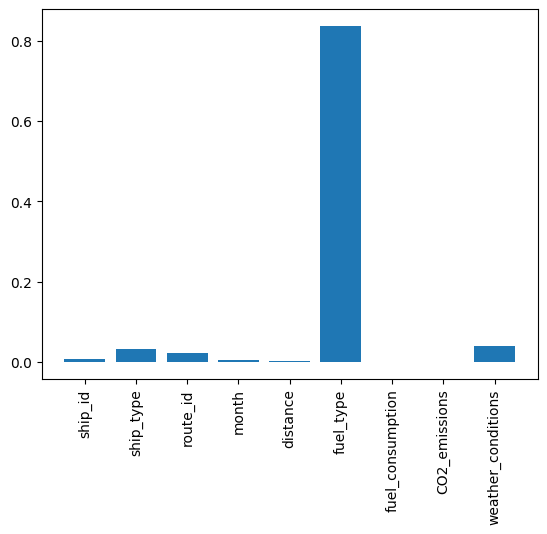

In [ ]:
X = Xdf.values  # Get the NumPy array from Xdf
y = y

model = LinearRegression()
model.fit(Xdf, y)

# Getting feature importance
importance = model.coef_

# feature importance
for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (Xdf.columns[i], v))  # Printing feature name and their scores

# Plot feature importance
plt.bar(Xdf.columns, importance)  # Using original feature names for x-axis labels
plt.xticks(rotation=90)
plt.show()


In [ ]:
X=Xdf[['ship_type']]
y=data['engine_efficiency'] #checked each feature with target feature

##Linear Regression

Mean Squared Error: 51.08130037211882
R2 Score: 0.24259624783219413 %


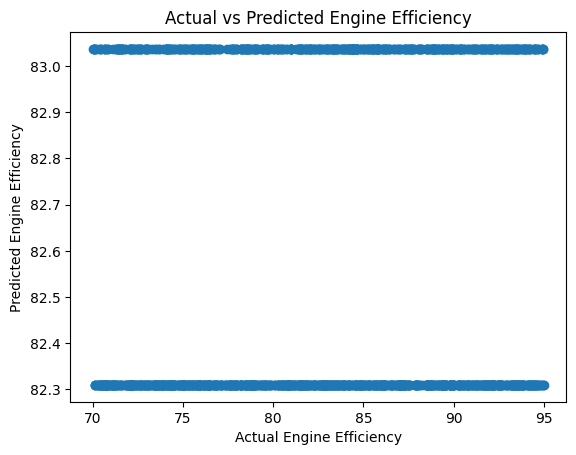

In [ ]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Evaluating model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2*100} %")

plt.scatter(y, y_pred)
# plt.plot(y, y_pred)
plt.xlabel("Actual Engine Efficiency")
plt.ylabel("Predicted Engine Efficiency")
plt.title("Actual vs Predicted Engine Efficiency")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2*100} %")


Mean Squared Error: 49.403015953980955
R2 Score: -0.03346600476874517 %


##KNN Regression

In [ ]:
k_values = [i for i in range(1, 50) if i % 2 != 0]
best_mse = float('inf')
best_r2=0
best_k=0
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    if mse < best_mse:
      best_mse = mse
      best_r2 = r2
      best_k=k

print(f"Best K value: {best_k}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R2 Score: {best_r2*100} %")

Best K value: 1
Best Mean Squared Error: 0.0
Best R2 Score: 100.0 %


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = [i for i in range(1, 1000) if i % 2 != 0]
best_mse = float('inf')
best_r2=0
best_k=0
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    if mse < best_mse:
      best_mse = mse
      best_r2 = r2
      best_k=k

print(f"Best K value: {best_k}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R2 Score: {best_r2*100} %")


Best K value: 551
Best Mean Squared Error: 49.30007231486864
Best R2 Score: 0.17497894185438678 %


##Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict and evaluate
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)

print(f"Mean Squared Error: {mse}\n")
print(f"R2 Score: {r2_score(y, y_pred)}")



Mean Squared Error: 50.92525247132457

R2 Score: 0.005473444302552699


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train) # Transform the training data
X_test_poly = poly.transform(X_test) # Transform the testing data

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict and evaluate using the transformed test data
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}\n")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 50.224553835403924

R2 Score: -0.01696953145098523
